# Sea Ice Extent Data Analysis

This notebook provides basic data manipulation and charting for Southern and Northern Hemisphere sea ice extent data. 

## 1. Import Required Libraries

Import pandas for data manipulation, matplotlib for plotting, and statsmodels for trend analysis.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## 2. Read Sea Ice Extent Data

Read Southern and Northern Hemisphere sea ice extent data files into pandas DataFrames, skipping comment lines and using whitespace as delimiter.

In [90]:
# Download sea ice extent data files (run in a notebook cell with ! for shell commands)
!curl -O ftp://osisaf.met.no/prod_test/ice/index/v2p2/sh/osisaf_sh_sie_daily.txt
!curl -O ftp://osisaf.met.no/prod_test/ice/index/v2p2/nh/osisaf_nh_sie_daily.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  657k  100  657k    0     0   590k      0  0:00:01  0:00:01 --:--:--  590k
100  657k  100  657k    0     0   590k      0  0:00:01  0:00:01 --:--:--  590k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  658k  100  658k    0     0   471k      0  0:00:01  0:00:01 --:--:--  471k
100  658k  100  658k    0     0   471k      0  0:00:01  0:00:01 --:--:--  471k


In [77]:
# File paths
file_path_sh = 'osisaf_sh_sie_daily.txt'
file_path_nh = 'osisaf_nh_sie_daily.txt'

# Read Southern Hemisphere data
df_sh = pd.read_csv(
    file_path_sh,
    comment='#',
    delim_whitespace=True,
    names=['FracYear', 'YYYY', 'MM', 'DD', 'SIE', 'Source']
)

# Read Northern Hemisphere data
df_nh = pd.read_csv(
    file_path_nh,
    comment='#',
    delim_whitespace=True,
    names=['FracYear', 'YYYY', 'MM', 'DD', 'SIE', 'Source']
)

/tmp/ipykernel_64618/2255832978.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_sh = pd.read_csv(
/tmp/ipykernel_64618/2255832978.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nh = pd.read_csv(


## 3. Find and Display Missing or Zero Data

Identify and display rows with zero or missing sea ice extent values in both hemispheres.

In [78]:
# Southern Hemisphere: Find zero or missing SIE values
zero_sie_sh = df_sh[df_sh['SIE'] == 0]
missing_sie_sh = df_sh[df_sh['SIE'].isna()]

print('Southern Hemisphere - Zero SIE rows:')
print(zero_sie_sh)
print('Southern Hemisphere - Missing SIE rows:')
print(missing_sie_sh)

# Northern Hemisphere: Find zero or missing SIE values
zero_sie_nh = df_nh[df_nh['SIE'] == 0]
missing_sie_nh = df_nh[df_nh['SIE'].isna()]

print('Northern Hemisphere - Zero SIE rows:')
print(zero_sie_nh)
print('Northern Hemisphere - Missing SIE rows:')
print(missing_sie_nh)

Southern Hemisphere - Zero SIE rows:
Empty DataFrame
Columns: [FracYear, YYYY, MM, DD, SIE, Source]
Index: []
Southern Hemisphere - Missing SIE rows:
Empty DataFrame
Columns: [FracYear, YYYY, MM, DD, SIE, Source]
Index: []
Northern Hemisphere - Zero SIE rows:
Empty DataFrame
Columns: [FracYear, YYYY, MM, DD, SIE, Source]
Index: []
Northern Hemisphere - Missing SIE rows:
Empty DataFrame
Columns: [FracYear, YYYY, MM, DD, SIE, Source]
Index: []


In [79]:
# Interpolate missing SIE values for both hemispheres
# Southern Hemisphere
if df_sh['SIE'].isna().any():
    df_sh['SIE'] = df_sh['SIE'].interpolate()

# Northern Hemisphere
if df_nh['SIE'].isna().any():
    df_nh['SIE'] = df_nh['SIE'].interpolate()

In [80]:
df_sh['Date'] = pd.to_datetime(
	df_sh[['YYYY', 'MM', 'DD']].rename(columns={'YYYY': 'year', 'MM': 'month', 'DD': 'day'})
)

df_nh['Date'] = pd.to_datetime(
    df_nh[['YYYY', 'MM', 'DD']].rename(columns={'YYYY': 'year', 'MM': 'month', 'DD': 'day'})
)


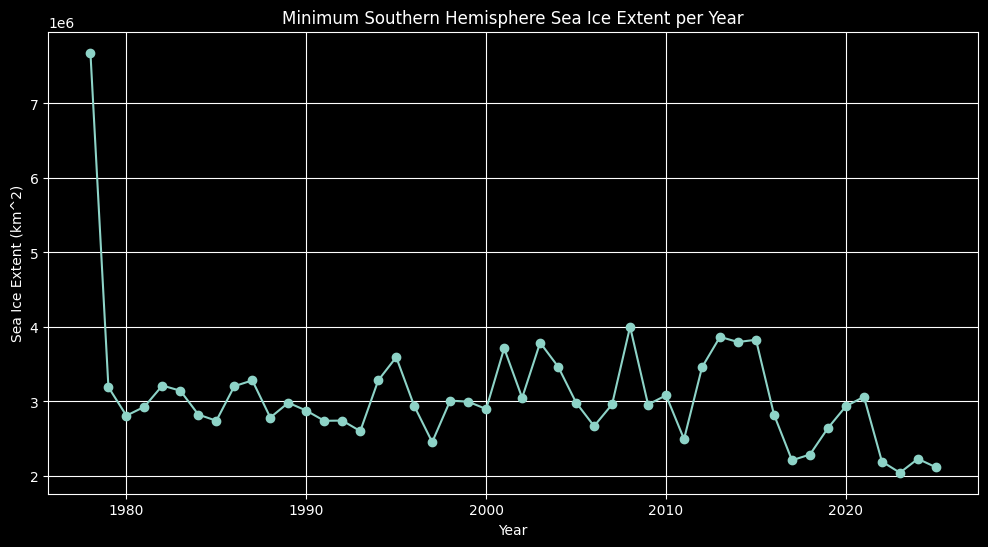

In [81]:
# Replace -999 with NaN and interpolate missing SIE values for both hemispheres
import numpy as np

df_sh['SIE'] = pd.to_numeric(df_sh['SIE'].replace(-999, np.nan), errors='coerce')
df_sh['SIE'] = df_sh['SIE'].interpolate()

df_nh['SIE'] = pd.to_numeric(df_nh['SIE'].replace(-999, np.nan), errors='coerce')
df_nh['SIE'] = df_nh['SIE'].interpolate()

# Create a Date column if it does not exist and required columns are present
required_cols = {'YYYY', 'MM', 'DD'}
if 'Date' not in df_sh.columns and required_cols.issubset(df_sh.columns):
	df_sh['Date'] = pd.to_datetime(df_sh[['YYYY', 'MM', 'DD']])

min_sie_sh_by_year = df_sh.groupby(df_sh['Date'].dt.year)['SIE'].min()

plt.figure(figsize=(12, 6))
min_sie_sh_by_year.plot(marker='o')
plt.title('Minimum Southern Hemisphere Sea Ice Extent per Year')
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (km^2)')
plt.grid(True)
plt.show()

## 6. Plot Minimum Sea Ice Extent Per Year with Dates (Southern Hemisphere)

Plot minimum Southern Hemisphere sea ice extent per year, labeling each point with the date of minimum extent.

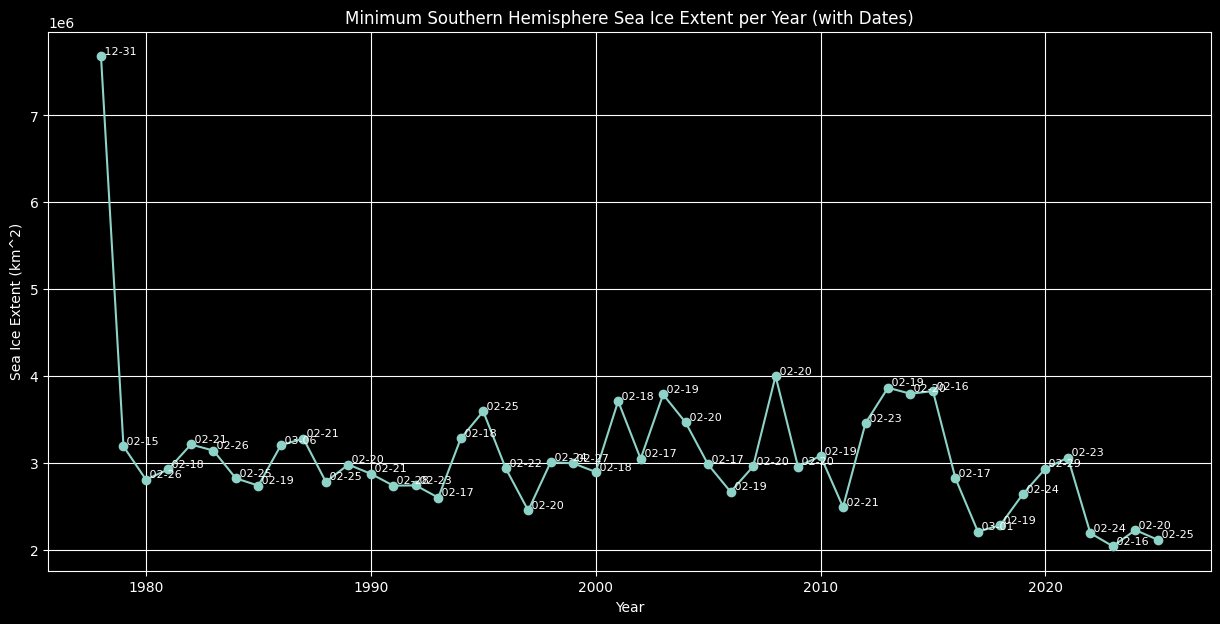

In [83]:
min_idx_sh = df_sh.groupby(df_sh['Date'].dt.year)['SIE'].idxmin()
min_sie_sh_df = df_sh.loc[min_idx_sh]

plt.figure(figsize=(15, 7))
plt.plot(min_sie_sh_df['Date'].dt.year, min_sie_sh_df['SIE'], marker='o')
for _, row in min_sie_sh_df.iterrows():
    plt.text(row['Date'].year, row['SIE'], f" {row['Date'].strftime('%m-%d')}", verticalalignment='bottom', fontsize=8)
plt.title('Minimum Southern Hemisphere Sea Ice Extent per Year (with Dates)')
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (km^2)')
plt.grid(True)
plt.show()

## 6. Plot Minimum Sea Ice Extent Per Year with Dates (Northern Hemisphere)

Plot minimum Northern Hemisphere sea ice extent per year, labeling each point with the date of minimum extent.

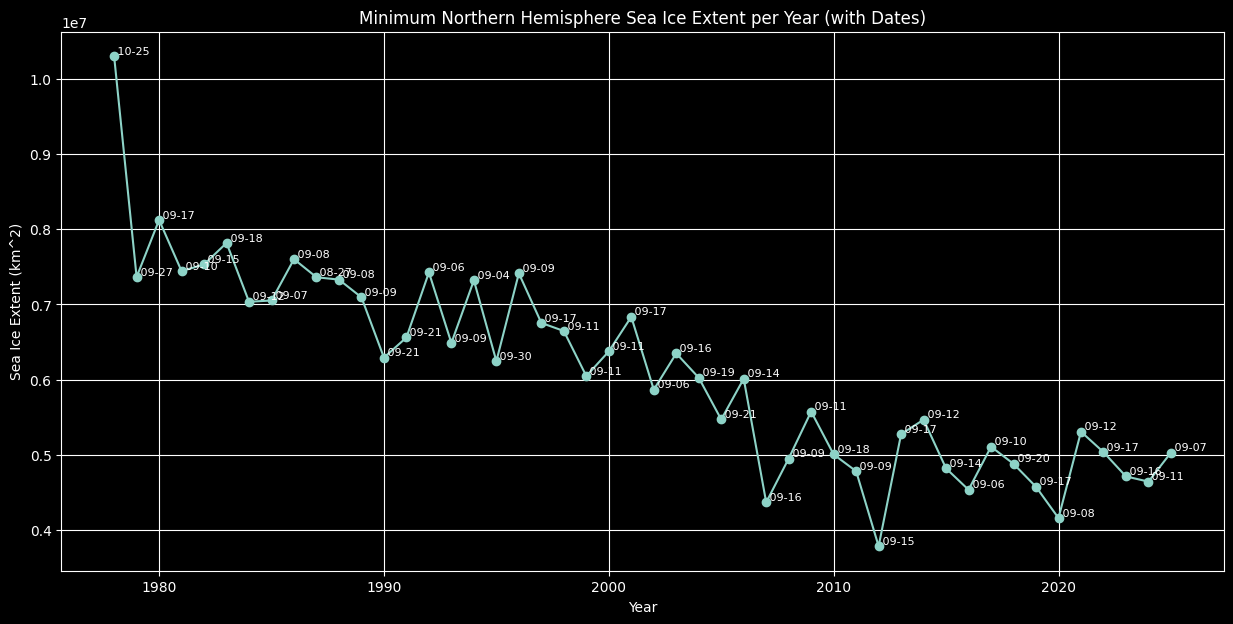

In [ ]:
min_idx_nh = df_nh.groupby(df_nh['Date'].dt.year)['SIE'].idxmin()
min_sie_nh_df = df_nh.loc[min_idx_nh]

plt.figure(figsize=(15, 7))
plt.plot(min_sie_nh_df['Date'].dt.year, min_sie_nh_df['SIE'], marker='o')
for _, row in min_sie_nh_df.iterrows():
    plt.text(row['Date'].year, row['SIE'], f" {row['Date'].strftime('%m-%d')}", verticalalignment='bottom', fontsize=8)
plt.title('Minimum Northern Hemisphere Sea Ice Extent per Year (with Dates)')
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (km^2)')
plt.grid(True)
plt.show()

## 7. Plot Time Series of Sea Ice Extent (Both Hemispheres)

Create time series plots for sea ice extent for both hemispheres.

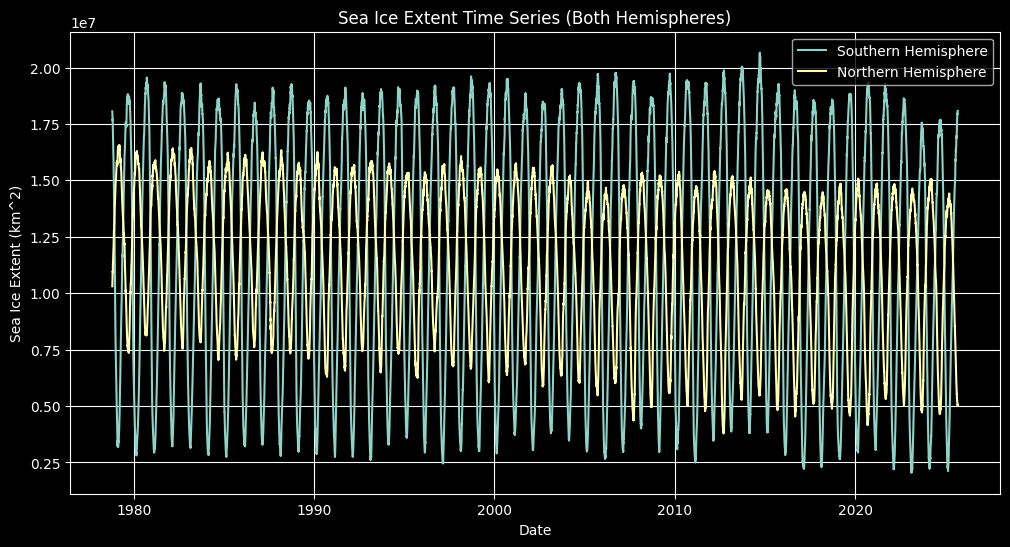

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(df_sh['Date'], df_sh['SIE'], label='Southern Hemisphere')
plt.plot(df_nh['Date'], df_nh['SIE'], label='Northern Hemisphere')
plt.title('Sea Ice Extent Time Series (Both Hemispheres)')
plt.xlabel('Date')
plt.ylabel('Sea Ice Extent (km^2)')
plt.legend()
plt.grid(True)
plt.show()

## 8. Plot Trend of Sea Ice Extent (Both Hemispheres)

Use seasonal decomposition to plot the trend component of sea ice extent for both hemispheres.

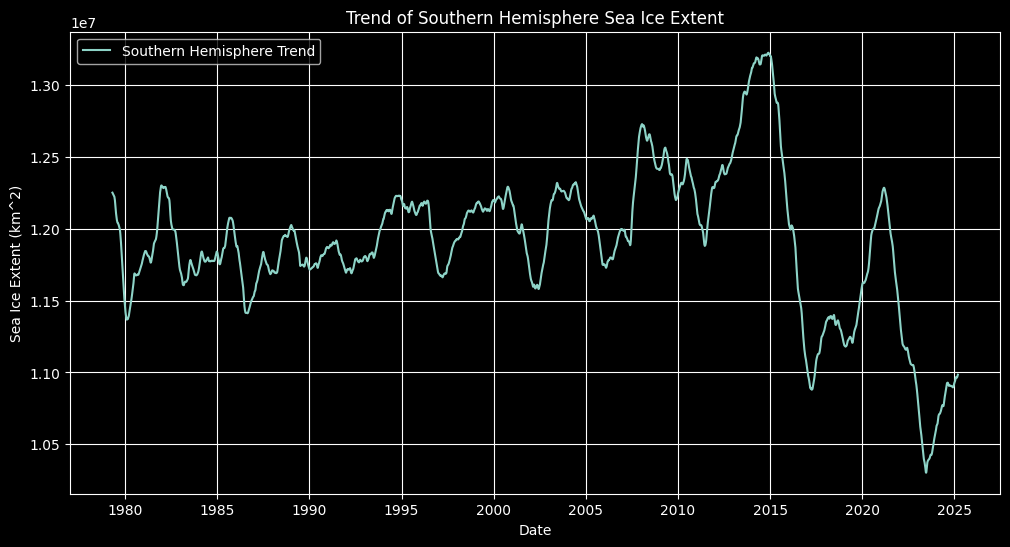

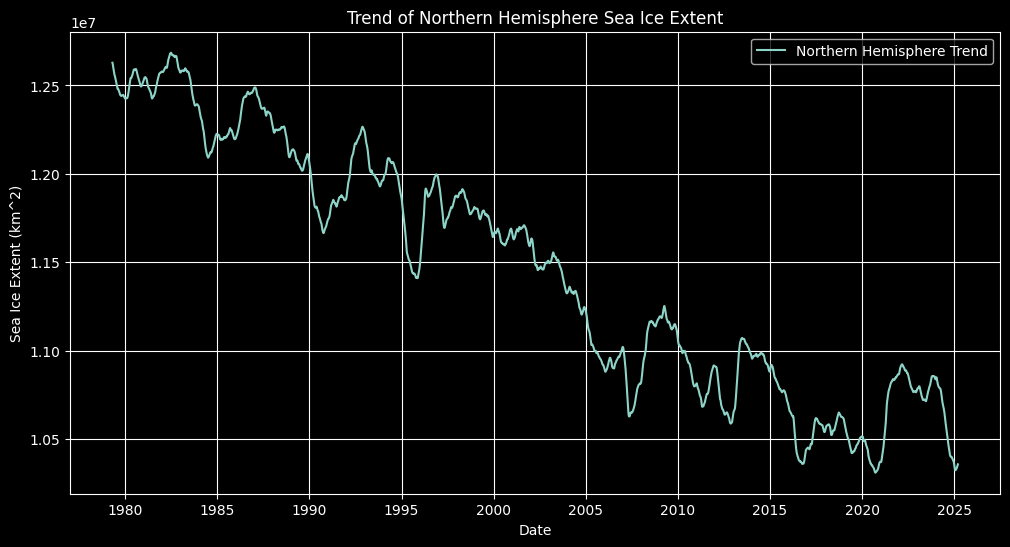

In [87]:
# Southern Hemisphere trend
df_sh_trend = df_sh.set_index('Date')
result_sh = seasonal_decompose(df_sh_trend['SIE'], model='additive', period=365)

plt.figure(figsize=(12, 6))
plt.plot(result_sh.trend, label='Southern Hemisphere Trend')
plt.title('Trend of Southern Hemisphere Sea Ice Extent')
plt.xlabel('Date')
plt.ylabel('Sea Ice Extent (km^2)')
plt.grid(True)
plt.legend()
plt.show()

# Northern Hemisphere trend
df_nh_trend = df_nh.set_index('Date')
result_nh = seasonal_decompose(df_nh_trend['SIE'], model='additive', period=365)

plt.figure(figsize=(12, 6))
plt.plot(result_nh.trend, label='Northern Hemisphere Trend')
plt.title('Trend of Northern Hemisphere Sea Ice Extent')
plt.xlabel('Date')
plt.ylabel('Sea Ice Extent (km^2)')
plt.grid(True)
plt.legend()
plt.show()